# MedSun NLP

This document is to show and describe each step of NLP analysis taken on the The Medical Product Safety Network (MedSun) datasets directly from the U.S. Food and Drug Administration (FDA) webpage. 

MedSun is an Adverse Event(AE) reporting program foces on medical devices since 2002 under the Center for Devices and Radiological Health(CDRH) of the U.S. FDA. The data consist of unstructured narrative natural language. <https://www.fda.gov/medicaldevices/safety/medsunmedicalproductsafetynetwork/>

The main goal of the analysis is to determine the corelations between the words frequently used and/or mentioned in the event description and each category of event problems. If there is high correlation, that means the AE report had been well evaluated and input the event problem, and also implies that the NLP technology can be adopted in clinical dataset in unstructured narrative format.

**Analysis:**

*Learning objectives:*
- To understand the features of the dataset to be analyzed and complete proper and optimal preprocessing approaches .
- To understand the various types and stages of the NLP pipeline and apply those during extracting features.
- To understand the each method taken or experimented to the dataset, train and apply machine learning to test and selct the best model.

*Methods:*
-	Main pipeline: NLTK with Python
-	NLP steps processed
    - Proprocessing: Basic data cleaning, Tokenizing, Stemming
    - Feature Engineering: Bag of Words, N-grams, TF-IDF, Sentiment Analysis
    - Classification: Boosting(using Random Forest)



**How did you measure performance, and chose the best model:**
- I compared the accuracy scores of all five classifiers. As a result, the Counter Vectors on Naive Bayes Model 
  performed the best with the dataset. Therefore, I added Confusion Matrix of it. 

* Result Summary:
   * Stemmed only
     Counter Vecter: 0.6585(NB), 0.5853(LM), 0.6829(Bagging), 0.5853(Boosting)
     TF-IDF Vector: 0.6829(NB), 0.6829(LM), 0.6585(Bagging), 0.6341(Boosting)
     N-grams TF-IDF Vector: 0.6829(NB), 0.6829(LM), 0.6829(SVM), 0.6829(Bagging), 0.(Boosting)
   * Lemmatized only
     Counter Vecter: 0.6585(NB), 0.6097(LM), 0.6829(Bagging), 0.6097(Boosting)
     TF-IDF Vector: 0.6829(NB), 0.6829(LM), 0.6829(Bagging), 0.6585(Boosting)
     N-grams TF-IDF Vector: 0.6829(NB), 0.6829(Bagging)
   * Both
     Counter Vecter: 0.6585(NB), 0.5853(LM), 0.6829(Bagging), 0.5853(Boosting)
     TF-IDF Vector: 0.6829(NB), 0.6829(LM), 0.6585(Bagging), 0.6341(Boosting)
     N-grams TF-IDF Vector: 0.6829(NB), 0.6829(Bagging)
   
     - Overall, with this training set, the optimal results was obtained when 'Random Forest Bagging' model which 
       'Lemmatized only' data. Even though it was slight differences, with that selection, the best accuracy gained 
       was 0.6829. Considering the accuracy of 71 percent from U.S. FDA`s experiment of AI assessment using 'Voting
       Ensemble Random Forest Boosting, 68 percent of accuracy can be regarded not that bad score.
       <https://www.fda.gov/downloads/Drugs/NewsEvents/UCM621740.pdf>
       
     - The N-gram TF-IDF Vector results show consistant values as 0.6829 for the all attemps, which implies there was
       something needed to be improved with the modeling. Therefore I ignored the whole results for choosing the best 
       model. 
     
     - When the word was run before testing the final attempt, the best result was obtained when 'Naive Bayes' model 
       is applied with 'Stemmed' only dataset. Based on that, there can be slight impact on the final result depend 
       on which one you select. Therefore, I would suggest to try and take as many as approaches possible in 
       searching for the optimal result. 
     
     - I alos applied the norm on deciding tools for Sentimental Analysis, and chose 'Textblob' over 'VADER'.
    
     - I tried to fix the matrix form of the result until the last moment but was not successful, but saved it for 
       future work.



**Final pipleline for the NLP project**
```
1. Data Collection & Preprocessing
    1) Importing dataset into dataframe
    2) Removing "punctuations' & "special characters"
    3) Lower case
    4) Correct spelling
    5) Remove "stopwords"
    6) Create a tokenizer
    7) Stemming
    9) Split dataset into training & testing
2. Data Feature Extraction
    1) Frequent & Rare words
    2) Entity Parsing
        A) POS tagging
        B) N-grams (Unigram & Bigram)
    3) Statistical Feature
        A) Sentiment Analysis
        B) TF-IDF
3. Model Training
    1) Text Classification
        A) Bagging with Random Forest
```

In [ ]:
#Pipeline & Libraries employeed

import pandas as pd
import numpy as np
import nltk
# nltk.download('punkt')
# nltk.download()
import random
import re
import spacy
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.corpus import state_union
from nltk.tokenize import PunktSentenceTokenizer
from nltk.probability import FreqDist
from nltk import bigrams, pos_tag
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.collocations import *
from collections import Counter
from collections import defaultdict
from string import punctuation
from heapq import nlargest
from textblob import TextBlob, Word

from pandas import Series, DataFrame
from pandas.api.types import CategoricalDtype # enables specifying categorical agetype below

from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble
from sklearn.preprocessing import Imputer, MinMaxScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#import sklearn.metrics as skm

import xgboost, string

import operator



### Contents of the project
1. Data Collection & Preprocessing
    1. Importing dataset into dataframe
    2. Removing "punctuations' & "special characters"
    3. Lower case
    4. Correct spelling
    5. Remove "stopwords"
    6. Create a tokenizer
    7. Stemming
    8. Lemmatization
    9. Split dataset into training & testing
2. Data Feature Extraction
    1. Frequent & Rare words
    2. Entity Parsing
        1. POS tagging
        2. N-grams (Unigram & Bigram)
    3. Statistical Feature
        1. Sentiment Analysis
        2. TF-IDF
        3. Bag of Words
3. Model Training
    1. Text Classification
        1. Naive Bayes
        2. Linear Classifier
        3. SVM
        4. Bagging - RF
        5. Boosting - RF

## 1. Data Collection & Preprocessing
### A. Importing dataset into dataframe
- Read the csv file of dataset in Jupyter Notebook
- Look at the dataset and set the responsive variable

In [2]:
# Set seed
np.random.seed(1)

# Read the csv file of dataset into a dataframe
data = pd.read_csv('MedsunExcelReport15.csv', delim_whitespace=False)
data.describe()

,Device Brand,Device Manufacturer,Device Type,Device Problem,Date Report,Event Description
count,156,164,164,164,164,164
unique,119,48,66,8,139,164
top,FINELINE® II EZ Sterox,Medtronic Inc.,permanent pacemaker electrode,Potential for patient harm,08/08/2018,Lead was implanted and was functioning correct...
freq,6,29,18,114,9,1


#### Interim checking 1:

*Checking point of dataset*
  - shape & format
  - null values
  - input & target variables

The dataset consist of 164 rows and 2 columns without any null or NA values. I set the "Event Description" as input variable, and "Device Problem" as target variable, renamed the columns of those variables by adding underbar to fill in the space, and decided to remove all the other variables. In addition, I created a new variable converting the categorical values of target variable to numeric values according to its categories since some data input in the same category were not consistant. 

In [3]:
# Drop the other variables
data = data.drop(['Device Brand', 'Device Manufacturer', 'Device Type', 'Date Report'], axis=1)
data ## check the result

,Device Problem,Event Description
0,Potential for patient harm,Latitude alert for voltage too low for project...
1,Not applicable,During RA lead extraction - the RV lead was no...
2,Not applicable,Found on Latitude alert RA lead to have polari...
3,Death,Elderly male undergoing a Micra pacemaker plac...
4,Potential for patient harm,At 0030 tmv pacer wire was moved by the fellow...
5,Potential for patient harm,Surgical removal and replacement of failed lef...
6,Potential for patient harm,The pacemaker was not sensing after multiple a...
7,Potential for patient harm;Minor injury to the...,At a critical time in the surgery - the pacema...
8,Potential for patient harm,Patient was being taken off the bypass machine...
9,Potential for patient harm,Patient on cardiopulmonary bypass. Surgeon wen...


In [4]:
# Rename variables
data.rename(columns={'Device Problem': 'Device_Problem', 'Event Description': 'Event_Description'}, inplace=True)
data ## check the result

,Device_Problem,Event_Description
0,Potential for patient harm,Latitude alert for voltage too low for project...
1,Not applicable,During RA lead extraction - the RV lead was no...
2,Not applicable,Found on Latitude alert RA lead to have polari...
3,Death,Elderly male undergoing a Micra pacemaker plac...
4,Potential for patient harm,At 0030 tmv pacer wire was moved by the fellow...
5,Potential for patient harm,Surgical removal and replacement of failed lef...
6,Potential for patient harm,The pacemaker was not sensing after multiple a...
7,Potential for patient harm;Minor injury to the...,At a critical time in the surgery - the pacema...
8,Potential for patient harm,Patient was being taken off the bypass machine...
9,Potential for patient harm,Patient on cardiopulmonary bypass. Surgeon wen...


In [5]:
# Set categories of target variable:
## death = 5
## serious = 4
## minor =3
## potential = 2
## not known = 1
## not applicable = 0

# Firstly create a new column and fill in the all values with '2'
data['new_DP'] = 2
data  ## check the result

,Device_Problem,Event_Description,new_DP
0,Potential for patient harm,Latitude alert for voltage too low for project...,2
1,Not applicable,During RA lead extraction - the RV lead was no...,2
2,Not applicable,Found on Latitude alert RA lead to have polari...,2
3,Death,Elderly male undergoing a Micra pacemaker plac...,2
4,Potential for patient harm,At 0030 tmv pacer wire was moved by the fellow...,2
5,Potential for patient harm,Surgical removal and replacement of failed lef...,2
6,Potential for patient harm,The pacemaker was not sensing after multiple a...,2
7,Potential for patient harm;Minor injury to the...,At a critical time in the surgery - the pacema...,2
8,Potential for patient harm,Patient was being taken off the bypass machine...,2
9,Potential for patient harm,Patient on cardiopulmonary bypass. Surgeon wen...,2


In [6]:
#data[data['Device_Problem'].str.match('Death')]  ## test sorted

# Extract rows of input variable which are matched to the each category of target variable
data.loc[data['Device_Problem'].str.match('Death'), 'new_DP'] = 5

# 'mstch()' function gave back syntex errors more than one word, so I switched to 'contains()' for combinations of words
# I used the regular expression "|" for combination of more than one word
data.loc[data['Device_Problem'].str.contains('Serious|serious'), 'new_DP'] = 4
data.loc[data['Device_Problem'].str.contains('Minor|minor'), 'new_DP'] = 3
data.loc[data['Device_Problem'].str.contains('Known|known'), 'new_DP'] = 1
data.loc[data['Device_Problem'].str.contains('Applicable|NA|applicable'), 'new_DP'] = 0
data ## check the result

#studied at:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.match.html
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.loc.html

,Device_Problem,Event_Description,new_DP
0,Potential for patient harm,Latitude alert for voltage too low for project...,2
1,Not applicable,During RA lead extraction - the RV lead was no...,0
2,Not applicable,Found on Latitude alert RA lead to have polari...,0
3,Death,Elderly male undergoing a Micra pacemaker plac...,5
4,Potential for patient harm,At 0030 tmv pacer wire was moved by the fellow...,2
5,Potential for patient harm,Surgical removal and replacement of failed lef...,2
6,Potential for patient harm,The pacemaker was not sensing after multiple a...,2
7,Potential for patient harm;Minor injury to the...,At a critical time in the surgery - the pacema...,3
8,Potential for patient harm,Patient was being taken off the bypass machine...,2
9,Potential for patient harm,Patient on cardiopulmonary bypass. Surgeon wen...,2


##### input & target variables

- After checking the information of the data, there was no null or "NA" instance.
- Based on the analytic goal of this project, I set the '(Adverse) Event Description' column as the input variable, and the 'Device Problem' column as my target variable.

In [7]:
# Use iloc for index based variable selection
data_x = data.loc[:,'Event_Description']
data_y = data.loc[:, 'new_DP']

In [8]:
data_x ## check the result

0      Latitude alert for voltage too low for project...
1      During RA lead extraction - the RV lead was no...
2      Found on Latitude alert RA lead to have polari...
3      Elderly male undergoing a Micra pacemaker plac...
4      At 0030 tmv pacer wire was moved by the fellow...
5      Surgical removal and replacement of failed lef...
6      The pacemaker was not sensing after multiple a...
7      At a critical time in the surgery - the pacema...
8      Patient was being taken off the bypass machine...
9      Patient on cardiopulmonary bypass. Surgeon wen...
10     when coming off of cardio-pulmonary bypass a p...
11     Initial temporary pacing wire was opened; prio...
12     Temporary atrioventricular (AV) pacer wires we...
13     Latitude alert for RV impedance out of range -...
14     Patient had a mitral valve repair - tricuspid ...
15     Latitude alert for MV sensor noise on RA chann...
16     FDA report due to RV lead oversensing MV senso...
17     It was reported that pat

In [9]:
data_y  ## check the result

0      2
1      0
2      0
3      5
4      2
5      2
6      2
7      3
8      2
9      2
10     2
11     2
12     2
13     2
14     2
15     2
16     2
17     2
18     2
19     2
20     2
21     2
22     2
23     2
24     2
25     1
26     2
27     2
28     2
29     1
      ..
134    2
135    3
136    3
137    2
138    2
139    2
140    2
141    3
142    3
143    2
144    2
145    2
146    2
147    1
148    5
149    2
150    4
151    2
152    3
153    2
154    2
155    0
156    2
157    2
158    1
159    2
160    2
161    2
162    4
163    2
Name: new_DP, Length: 164, dtype: int64

In [10]:
# Check the levels of target variable
data_y.unique()

array([2, 0, 5, 3, 1, 4])

### B. Remove "punctuations' & "special characters"
  - special characters includes symbols and non-alphanumerics

In [11]:
# Assign punctuation to remove
remove = set(string.punctuation)

def no_punc(text_data):
    try:
        text_data = ''.join(character for character in text_data if character not in remove)
    except:
        pass
    return text_data

# Apply the function to the DataFrame
data_x_no_punc = data_x.apply(no_punc)
data_x_no_punc.head() ## check the result

#references:
#p.34 "Removing punctuation in Pandas"; Python Business Intelligence Cookbook by Robert Dempsey; Packt Publishing Released; December 2015
#https://pandas.pydata.org/pandas-docs/stable/merging.html
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.apply.html

0    Latitude alert for voltage too low for project...
1    During RA lead extraction  the RV lead was not...
2    Found on Latitude alert RA lead to have polari...
3    Elderly male undergoing a Micra pacemaker plac...
4    At 0030 tmv pacer wire was moved by the fellow...
Name: Event_Description, dtype: object

In [12]:
# Assign special characters to move
special_characters = '([{,–:-=}])'

# Remove special characters
data_x_no_schar = data_x_no_punc.str.replace(special_characters,'')
data_x_no_schar.head()

#references:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.replace.html

0    Latitude alert for voltage too low for project...
1    During RA lead extraction  the RV lead was not...
2    Found on Latitude alert RA lead to have polari...
3    Elderly male undergoing a Micra pacemaker plac...
4    At 0030 tmv pacer wire was moved by the fellow...
Name: Event_Description, dtype: object

#### Interim check 2:

*checking point*
- Difference in result between removing punctuation and special characters

Realized that punctuation itself worked for removing all including special characters. So this step turned out to be a redundant process. This process will not be added to the final work as well as future works.

### C. Lower case

In [13]:
# Lower case
data_x_lower = data_x_no_schar.str.lower()
data_x_lower.head() ## check the result

#references:
#https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.lower.html

0    latitude alert for voltage too low for project...
1    during ra lead extraction  the rv lead was not...
2    found on latitude alert ra lead to have polari...
3    elderly male undergoing a micra pacemaker plac...
4    at 0030 tmv pacer wire was moved by the fellow...
Name: Event_Description, dtype: object

### D. Correct spelling

In [14]:
# Spell check using TextBlob under lambda function: Textblob adapt 'correct()' function
data_x_corrected = data_x_lower.apply(lambda x: str(TextBlob(x).correct()))
data_x_corrected.head()  ## check the result

#references:
#https://community.modeanalytics.com/python/tutorial/pandas-groupby-and-python-lambda-functions/
#https://pythonconquerstheuniverse.wordpress.com/2011/08/29/lambda_tutorial/

0    latitude alert for voltage too low for project...
1    during ra lead extraction  the re lead was not...
2    found on latitude alert ra lead to have popula...
3    elderly male undergoing a micro pacemaker plac...
4    at 0030 tm paper wire was moved by the fellow ...
Name: Event_Description, dtype: object

### E. Remove "stop words"

In [15]:
# set stopwords as filters 
filters = set(stopwords.words('english'))

#filters   ## check filters: the format was list of strings

# create a new variable to store cleaned words passing through filters using lambda function, but "x!=filers" didn`t work for every elements for filters
#data_x_clean = data_x_corrected.apply(lambda x: ', '.join(x for x in x.split() if x!= filters))
# In filtering out words through filters, I used the same logic for the code as the one used for removing stop words
data_x_clean = data_x_corrected.apply(lambda x: ' '.join(x for x in x.split() if x not in filters))
data_x_clean.head()

0    latitude alert voltage low projected remaining...
1    ra lead extraction lead noted definite impendi...
2    found latitude alert ra lead popularity switch...
3    elderly male undergoing micro pacemaker placem...
4    0030 tm paper wire moved fellow 51 cm chest x ...
Name: Event_Description, dtype: object

### F. Create a tokenizer

In [16]:
# Assign a variable of 'tokens': the dataset is already stored in a dataframe, so this works just for temporary column name
tokens = pd.DataFrame({'sent': data_x_clean})
#tokens  ## check the result

# NLTK build in 'word_tokenize' module is applied
tokens['word'] = tokens.apply(lambda row: nltk.word_tokenize(row['sent']), axis=1)
tokens['word']  ## check the result

0      [latitude, alert, voltage, low, projected, rem...
1      [ra, lead, extraction, lead, noted, definite, ...
2      [found, latitude, alert, ra, lead, popularity,...
3      [elderly, male, undergoing, micro, pacemaker, ...
4      [0030, tm, paper, wire, moved, fellow, 51, cm,...
5      [surgical, removal, replacement, failed, left,...
6      [pacemaker, sensing, multiple, attempts, depos...
7      [critical, time, surgery, pacemaker, cable, fa...
8      [patient, taken, pass, machine, team, trying, ...
9      [patient, cardiopulmonary, pass, surgeon, went...
10     [coming, cardiopulmonary, pass, pacemaker, nee...
11     [initial, temporary, pacing, wire, opened, pri...
12     [temporary, atrioventricular, paper, wires, ap...
13     [latitude, alert, impudence, range, automatic,...
14     [patient, moral, valve, repair, tricuspid, val...
15     [latitude, alert, senior, noise, ra, channel, ...
16     [da, report, due, lead, oversensing, senior, n...
17     [reported, patient, seni

### G. Stemming

In [17]:
# Also stemmed using NLTK module of 'PorterStemmer()' function.
data_x_stemmed = tokens['word'].apply(lambda x: ' '.join(nltk.PorterStemmer().stem(word) for word in x))
data_x_stemmed  ## check the result

0      latitud alert voltag low project remain capac ...
1      ra lead extract lead note definit impend fract...
2      found latitud alert ra lead popular switch due...
3      elderli male undergo micro pacemak placement b...
4      0030 tm paper wire move fellow 51 cm chest x r...
5         surgic remov replac fail left ventricular lead
6      pacemak sens multipl attempt deposit devic rem...
7      critic time surgeri pacemak cabl fail properli...
8      patient taken pass machin team tri get heart s...
9      patient cardiopulmonari pass surgeon went two ...
10     come cardiopulmonari pass pacemak need start p...
11     initi temporari pace wire open prior insert ba...
12     temporari atrioventricular paper wire appli en...
13     latitud alert impud rang automat popular switc...
14     patient moral valv repair tricuspid valv repai...
15     latitud alert senior nois ra channel result mo...
16     da report due lead oversens senior nois senior...
17     report patient senior no

In [18]:
# Quick check of the lenth
len(' '.join(data_x_stemmed))

60822

### H. Lemmatization

In [19]:
# Lemmatized only
data_x_lemmatized = tokens['word'].apply(lambda x: ' '.join([Word(word).lemmatize() for word in x]))
data_x_lemmatized.head()  ## check the result

0    latitude alert voltage low projected remaining...
1    ra lead extraction lead noted definite impendi...
2    found latitude alert ra lead popularity switch...
3    elderly male undergoing micro pacemaker placem...
4    0030 tm paper wire moved fellow 51 cm chest x ...
Name: word, dtype: object

In [20]:
# Quick check of the lenth
len(' '.join(data_x_lemmatized))

70811

In [21]:
# Both stemmed & lammatized
data_x_lemmatized = data_x_stemmed.apply(lambda x: ''.join([Word(word).lemmatize() for word in x]))
data_x_lemmatized.head()  ## check the result

#references:
#https://www.programcreek.com/python/example/107282/nltk.stem.WordNetLemmatizer

0    latitud alert voltag low project remain capac ...
1    ra lead extract lead note definit impend fract...
2    found latitud alert ra lead popular switch due...
3    elderli male undergo micro pacemak placement b...
4    0030 tm paper wire move fellow 51 cm chest x r...
Name: word, dtype: object

#### Interim check 3:

*Checking point*
- The difference in results between after stemming and after lemmatizing

Compared the results, lemmatized left more words, which means lemmatization cuts less words than stemming by about 18 percent(stemmed: 60,831 vs.lemmatized: 70,820). I will experiment how this make an impact on the final acuracy later. 

### I. Split dataset into training & testing

In [22]:
# Split using stemmed result
train_x, test_x, train_y, test_y = model_selection.train_test_split(data_x_stemmed,data_y)
print(train_x.describe())  ## check the result
print(train_y.describe())
print(test_x.describe())
print(test_y.describe())

count                                                   123
unique                                                  123
top       temporari pacemak stop work flight prior leav ...
freq                                                      1
Name: word, dtype: object
count    123.000000
mean       2.178862
std        0.830095
min        0.000000
25%        2.000000
50%        2.000000
75%        2.000000
max        5.000000
Name: new_DP, dtype: float64
count                                                    41
unique                                                   41
top       present complet heart block trial fibril alter...
freq                                                      1
Name: word, dtype: object
count    41.000000
mean      2.073171
std       0.905269
min       0.000000
25%       2.000000
50%       2.000000
75%       2.000000
max       5.000000
Name: new_DP, dtype: float64


In [23]:
train_x  ## check

33     pa check underli rhythm extern pacemak pace pa...
59     review insert patient pin lead note bent unabl...
85     postop day 1 pacemak plant interrog reveal lea...
116    patient recent devic interrog reveal perpetu e...
151    note discharg summari recent patient symptom f...
136    paper complet ceas sanction without new batter...
12     temporari atrioventricular paper wire appli en...
58     lead implant sanction correctli devic attach l...
111              malfunct paper lead requir remov replac
28     doctor note malfunct right trial pace sens lea...
56     note histori physic patient coronari arteri di...
124    temporari paper epicardi wire stop work patien...
158    temporari pacemak stop work flight prior leav ...
17     report patient senior nois ra lead bc advisori...
81     patient went cardiologist offic evalu pacemak ...
91     patient return insert perman pacemak open hear...
13     latitud alert impud rang automat popular switc...
114    upon examin discov lead 

## 2. Data Feature Extraction
### A. Frequent & Rare words

In [24]:
# Quick check of the frequent words in order of frequency in train set after split the data
freq = pd.Series(' '.join(train_x).split(' ')).value_counts()[:30]
freq  ##check

lead           251
patient        236
pacemak        137
pace           102
devic           97
remov           61
right           59
paper           57
chang           57
batteri         56
gener           50
note            50
ventricular     49
trial           46
day             45
replac          43
implant         40
wire            38
new             37
procedur        36
place           36
report          36
impud           35
manufactur      34
issu            33
heart           33
per             30
back            29
medtron         28
ice             28
dtype: int64

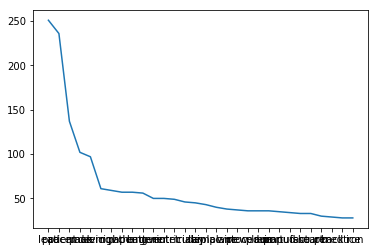

In [25]:
plt.plot(freq)
plt.show()  ## check

In [26]:
# Quick check the rare words from the adverse order: I ended up not removing the least 30 words as I could see the medical terminology in it
# Although they`re unstructured natural language, words related to clinical information can be included.
rare = pd.Series(' '.join(train_x).split(' ')).value_counts()[-30:]
rare  ##check

uncompl        1
ingeni         1
challeng       1
hear           1
brain          1
particular     1
renal          1
pleural        1
anaesthesia    1
liabil         1
situat         1
concord        1
smoke          1
85             1
thu            1
4469           1
388            1
consequ        1
14             1
random         1
enter          1
distend        1
dwell          1
diagnost       1
incorpor       1
weak           1
massag         1
reliev         1
stage          1
826            1
dtype: int64

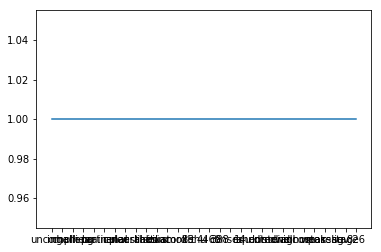

In [27]:
plt.plot(rare)
plt.show()  ## check

### B. Entity Parsing
#### a. "POS Tagging"

In [28]:
# create and assign unigram variable and sort the most common words using with the built-in function of nltk.FreqDis().

# convert the format of 'train_x': create 'unigram_x' variable by merging all the words of 'train_x' divided in rows and splitting to each word
unigram_x = pd.Series(' '.join(train_x).split(' '))

# create unigram by inputting 'unigram_x' on NLTF built-in function of nltk.FreqDis(): the function of NLTF gives value counts for list of each word and shows it sorted
unigram = nltk.FreqDist(unigram_x)

#convert to list
unigram_most_common = unigram.most_common()

#convert to data frame
unigram_most_common_table = pd.DataFrame(unigram_most_common,columns=['token','freq'])

#unigram_most_common_table
#len(unigram) ## check = 1521

#unigram_most_common_table.shape
unigram_most_common_table.head(30)

,token,freq
0,lead,251
1,patient,236
2,pacemak,137
3,pace,102
4,devic,97
5,remov,61
6,right,59
7,chang,57
8,paper,57
9,batteri,56


In [29]:
# Get pos_tagged words using the "pos_tag()" module
pos_list = pos_tag(unigram_x)
pos_list  ##check

[('pa', 'RB'),
 ('check', 'VB'),
 ('underli', 'JJ'),
 ('rhythm', 'NN'),
 ('extern', 'JJ'),
 ('pacemak', 'JJ'),
 ('pace', 'NN'),
 ('patient', 'NN'),
 ('set', 'VBN'),
 ('correctli', 'NN'),
 ('set', 'VBN'),
 ('screen', 'JJ'),
 ('blank', 'JJ'),
 ('rhythm', 'NN'),
 ('show', 'NN'),
 ('stop', 'JJ'),
 ('pace', 'NN'),
 ('alarm', 'NN'),
 ('indic', 'JJ'),
 ('quit', 'NN'),
 ('harm', 'NN'),
 ('done', 'VBN'),
 ('patient', 'JJ'),
 ('establish', 'VB'),
 ('rhythm', 'NN'),
 ('refus', 'NN'),
 ('dark', 'JJ'),
 ('discolor', 'NN'),
 ('note', 'NN'),
 ('top', 'JJ'),
 ('screen', 'NN'),
 ('review', 'NN'),
 ('insert', 'JJ'),
 ('patient', 'NN'),
 ('pin', 'NN'),
 ('lead', 'JJ'),
 ('note', 'NN'),
 ('bent', 'NN'),
 ('unabl', 'NN'),
 ('use', 'NN'),
 ('lead', 'JJ'),
 ('remov', 'NN'),
 ('new', 'JJ'),
 ('lead', 'NN'),
 ('use', 'NN'),
 ('injuri', 'JJ'),
 ('patient', 'JJ'),
 ('lead', 'NN'),
 ('given', 'VBN'),
 ('vendor', 'JJ'),
 ('postop', 'JJ'),
 ('day', 'NN'),
 ('1', 'CD'),
 ('pacemak', 'NN'),
 ('plant', 'NN'),
 ('inter

#### b. N-grams (Unigram & Bigram)

In [30]:
# Generate bigrams by inputting unigram data using "Collocation" package of NLTK
key_words = BigramCollocationFinder.from_words(unigram_x, window_size = 3)
key_words.apply_freq_filter(2)

# Sort the result based on the frequency 
bigram_freq=sorted(key_words.ngram_fd.items(), key = lambda x:x[1], reverse=True)
bigram_freq  ## check the result

#references:
#http://www.nltk.org/howto/collocations.html

[(('right', 'ventricular'), 24),
 (('ventricular', 'lead'), 23),
 (('lead', 'remov'), 22),
 (('trial', 'lead'), 20),
 (('right', 'lead'), 18),
 (('lead', 'patient'), 18),
 (('boston', 'scientif'), 18),
 (('per', 'report'), 18),
 (('manufactur', 'respons'), 17),
 (('per', 'site'), 17),
 (('site', 'report'), 17),
 (('pacemak', 'lead'), 16),
 (('lead', 'lead'), 15),
 (('year', 'ago'), 14),
 (('lead', 'replac'), 13),
 (('patient', 'procedur'), 13),
 (('procedur', 'well'), 13),
 (('ra', 'lead'), 13),
 (('lead', 'extract'), 13),
 (('right', 'trial'), 12),
 (('pace', 'threshold'), 12),
 (('toler', 'procedur'), 12),
 (('toler', 'well'), 12),
 (('pacemak', 'implant'), 12),
 (('remov', 'lead'), 11),
 (('gener', 'chang'), 11),
 (('right', 'ventricl'), 11),
 (('patient', 'toler'), 11),
 (('patient', 'pacemak'), 11),
 (('pacemak', 'patient'), 10),
 (('respons', 'pacemak'), 10),
 (('patient', 'underw'), 9),
 (('patient', 'admit'), 9),
 (('heart', 'block'), 9),
 (('paper', 'box'), 9),
 (('patient', '

In [31]:
# Similarly found collocations among words:
sim = BigramCollocationFinder.from_words(unigram_x, window_size = 20)
bigram_measures = nltk.collocations.BigramAssocMeasures()
sim.apply_freq_filter(2)
# Sort based on the frequency
most_sim50 = sim.nbest(bigram_measures.likelihood_ratio, 50)
most_sim50  ## check the result


#references:
#http://www.nltk.org/howto/collocations.html

[('lead', 'lead'),
 ('deliveri', 'deliveri'),
 ('year', 'ago'),
 ('deliveri', 'cathet'),
 ('boston', 'scientif'),
 ('pad', 'pad'),
 ('batteri', 'batteri'),
 ('respons', 'site'),
 ('say', 'marker'),
 ('tz', 'pad'),
 ('right', 'ventricular'),
 ('lead', 'batteri'),
 ('contact', 'issu'),
 ('respons', 'report'),
 ('look', 'like'),
 ('wire', 'wire'),
 ('see', 'provid'),
 ('manufactur', 'report'),
 ('see', 'compani'),
 ('manufactur', 'respons'),
 ('respons', 'per'),
 ('like', 'radiogram'),
 ('see', 'marker'),
 ('marker', 'compani'),
 ('move', 'balloon'),
 ('marker', 'provid'),
 ('spring', 'issu'),
 ('site', 'report'),
 ('tabl', 'team'),
 ('fibrou', 'capsul'),
 ('inject', 'deliveri'),
 ('toler', 'procedur'),
 ('defibril', 'pad'),
 ('manufactur', 'site'),
 ('per', 'site'),
 ('provid', 'compani'),
 ('provid', 'say'),
 ('document', 'say'),
 ('provid', 'see'),
 ('right', 'ventricl'),
 ('latitud', 'alert'),
 ('say', 'see'),
 ('deliveri', 'good'),
 ('tell', 'us'),
 ('provid', 'marker'),
 ('tz', 'dev

##### Interim check 4:

- The result of bigrams let me check out the most frequent, which is assumed as the most important, list of words. By using "Collocation" package, I was able to check the most similar paris are quite the same with the most frequent bigrams words.

### B. Statistical Featue
####  a. Sentiment Analysis 

In [32]:
# Using "Textblob()" module

# Get the sentiment scores: applied the same logic of function used for removing stopwords
def scores(x):
    try:
        return TextBlob(x).sentiment
    except:
        return None

train_x_sent = train_x.apply(scores)
train_x_sent.apply(pd.Series, index=['polarity','subjectivity'])

##references:


,polarity,subjectivity
33,0.116667,0.300000
59,0.136364,0.454545
85,0.068182,0.227273
116,0.296429,0.471429
151,0.183333,0.466667
136,0.030303,0.152862
12,0.000000,0.000000
58,0.000000,0.000000
111,0.000000,0.000000
28,0.225603,0.385343


In [33]:
# Using VADER module

# Calling the polarity_scores method on sid and passing in the train_x outputs a dictionary with negative, neutral, positive, and compound scores for the input data
module = SentimentIntensityAnalyzer()
scores = pd.DataFrame(train_x.apply(lambda x: module.polarity_scores(x)))
scores  ## check

#references:
#http://www.nltk.org/howto/sentiment.html

,word
33,"{'neg': 0.22, 'neu': 0.732, 'pos': 0.049, 'com..."
59,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
85,"{'neg': 0.0, 'neu': 0.963, 'pos': 0.037, 'comp..."
116,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
151,"{'neg': 0.046, 'neu': 0.913, 'pos': 0.041, 'co..."
136,"{'neg': 0.114, 'neu': 0.886, 'pos': 0.0, 'comp..."
12,"{'neg': 0.048, 'neu': 0.808, 'pos': 0.144, 'co..."
58,"{'neg': 0.179, 'neu': 0.821, 'pos': 0.0, 'comp..."
111,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
28,"{'neg': 0.0, 'neu': 0.893, 'pos': 0.107, 'comp..."


##### Interim check 5: 
    
*Cheking point*
- Result comparison of Textblob vs. Vader

While 'Textblob' module gave back with two sentiment estimates as 'polarity', and 'subjectivity', Vader module gave me back 'negative', 'positive', 'neutral', and 'compound', which calculated the total sentiment scoring from those three categories. 
'Polarity' is a float in the range from -1 to 1, where 1 means positive statement. Subjectivity`s range is from 0 to 1; if subjectivity 0.0, means highly objective. From the row by rwo comparison, both analysis gave almost identical results. However, I selected 'Vader' provides more detailed sense about the sentiment of the sentence by addressing more categories of sentiment scores. 

####  b. TF-IDF
Statistical features - "Term Frequency – Inverse Document Frequency"(TF-IDF) convert the text documents into vector models on the basis of occurrence of words in the documents without taking considering the exact ordering.
           * TF(x) = (Number of times term t appears in a document) / (Total number of terms in the document)
           * IDF(x) = log_e(Total number of documents / Number of documents with term x in it)

#references:
#https://en.wikipedia.org/wiki/Tf%E2%80%93idf
#https://discuss.analyticsvidhya.com/t/how-to-use-tf-idf-feature-of-scikit-learn/3058

In [34]:
# To get TFIDF values, used direct module of sklearn, which creates a vocabulary dictionary and assigns an index to each word. 
tfidf = TfidfVectorizer()
output = tfidf.fit_transform(train_x)
print(output)  ## check

#references:
#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html 

  (0, 899)	0.19736572641393077
  (0, 288)	0.15144374423289272
  (0, 1349)	0.16839218151293556
  (0, 1105)	0.36741059799569253
  (0, 536)	0.14305571126045857
  (0, 901)	0.06691233063086227
  (0, 900)	0.1647031581886388
  (0, 925)	0.10675606838664838
  (0, 1159)	0.27883727322388074
  (0, 348)	0.18534061879297845
  (0, 1133)	0.39473145282786154
  (0, 225)	0.19736572641393077
  (0, 1167)	0.12021019004803819
  (0, 1224)	0.15636707389198323
  (0, 134)	0.19736572641393077
  (0, 681)	0.12021019004803819
  (0, 1025)	0.19736572641393077
  (0, 626)	0.13941863661194037
  (0, 444)	0.16194868470770296
  (0, 510)	0.21431416369397366
  (0, 1054)	0.21431416369397366
  (0, 371)	0.21431416369397366
  (0, 428)	0.21431416369397366
  (0, 867)	0.0971337290794205
  (0, 1307)	0.18534061879297845
  :	:
  (121, 131)	0.29853521541459993
  (121, 847)	0.4529176624797759
  (121, 1257)	0.40391763010119375
  (121, 505)	0.40391763010119375
  (121, 531)	0.40391763010119375
  (122, 737)	0.16886403324889326
  (122, 328)	0

## 3. Model Training
### A. Text Classification

*Training model*

In [35]:
#Count Vectors as features: a matrix notation of the dataset in which every row represents a document from the corpus, every column represents a term from the corpus, and every cell represents the frequency count of a particular term in a particular document.
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word')
count_vect.fit(train_x)

# transform the training and validation data using count vectorizer object
count_train_x =  count_vect.transform(train_x)
count_test_x =  count_vect.transform(test_x)

In [36]:
#TF-IDF : Matrix representing tf-idf scores of every term in different documents
tfidf_vect = TfidfVectorizer(analyzer='word')
tfidf_vect.fit(train_x)

tfidf_train_x =  tfidf_vect.transform(train_x)
tfidf_test_x =  tfidf_vect.transform(test_x)

In [37]:
#N-gram Level TF-IDF : N-grams are the combination of N terms together. This Matrix representing tf-idf scores of N-grams
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', ngram_range=(2,3))
tfidf_vect_ngram.fit(train_x)
ngram_tfidf_tain_x =  tfidf_vect_ngram.transform(train_x)
ngram_tfidf_test_x =  tfidf_vect_ngram.transform(test_x)

#### a. Naive Bayes

In [38]:
# on Count Vectors
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(count_train_x, train_y)
pred_count = naive_bayes_model.predict(count_test_x)

print("Count Vectors Naive Bayes Accuracy: ", metrics.accuracy_score(pred_count, test_y))

Count Vectors Naive Bayes Accuracy:  0.6585365853658537


In [39]:
# on TF IDF Vectors
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(tfidf_train_x, train_y)
pred_tfidf = naive_bayes_model.predict(tfidf_test_x)

print("TF IDF Vectors Naive Bayes Accuracy: ", metrics.accuracy_score(pred_tfidf, test_y))

TF IDF Vectors Naive Bayes Accuracy:  0.6829268292682927


In [40]:
# on N-grams TF IDF Vectors
naive_bayes_model = naive_bayes.MultinomialNB()
naive_bayes_model.fit(ngram_tfidf_tain_x, train_y)
pred_ngram_tfidf = naive_bayes_model.predict(ngram_tfidf_test_x)

print("N-grams TF IDF Vectors Naive Bayes Accuracy: ", metrics.accuracy_score(pred_ngram_tfidf, test_y))

N-grams TF IDF Vectors Naive Bayes Accuracy:  0.6829268292682927


#### b. Linear Classification

In [41]:
# on Count Vectors
lin_model = linear_model.LogisticRegression()
lin_model.fit(count_train_x, train_y)
pred_count = lin_model.predict(count_test_x)

print("Count Vectors linear model Accuracy: ", metrics.accuracy_score(pred_count, test_y))

Count Vectors linear model Accuracy:  0.5853658536585366


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [42]:
# on TF IDF Vectors
lin_model=linear_model.LogisticRegression()
lin_model.fit(tfidf_train_x, train_y)
pred_tfidf = lin_model.predict(tfidf_test_x)

print("TF IDF Vectors Linear Moldel Accuracy: ", metrics.accuracy_score(pred_tfidf, test_y))

TF IDF Vectors Linear Moldel Accuracy:  0.6829268292682927


In [43]:
# on N-grams TF IDF Vectors
lin_model=linear_model.LogisticRegression()
lin_model.fit(ngram_tfidf_tain_x, train_y)
pred_ngram_tfidf = lin_model.predict(ngram_tfidf_test_x)

print("N-grams TF IDF Vectors Linear Model Accuracy: ", metrics.accuracy_score(pred_ngram_tfidf, test_y))

N-grams TF IDF Vectors Linear Model Accuracy:  0.6829268292682927


#### c. SVM

In [44]:
# on Count Vectors
svm_model=svm.SVC()
svm_model.fit(ngram_tfidf_tain_x, train_y)
pred_ngram_tfidf = svm_model.predict(ngram_tfidf_test_x)

print("N-grams TF IDF Vectors SVM Model Accuracy: ", metrics.accuracy_score(pred_ngram_tfidf, test_y))

N-grams TF IDF Vectors SVM Model Accuracy:  0.6829268292682927


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


#### d. Bagging - RF

In [45]:
# on Count Vectors
RF_bagging_model = ensemble.RandomForestClassifier()
RF_bagging_model.fit(count_train_x, train_y)
pred_count = RF_bagging_model.predict(count_test_x)

print("Count Vectors RF bagging model Accuracy: ", metrics.accuracy_score(pred_count, test_y))

Count Vectors RF bagging model Accuracy:  0.6829268292682927


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [46]:
# on TF IDF Vectors
#RF_bagging_model = ensemble.RandomForestClassifier()
RF_bagging_model.fit(tfidf_train_x, train_y)
pred_tfidf = RF_bagging_model.predict(tfidf_test_x)

print("TF IDF Vectors RF bagging Moldel Accuracy: ", metrics.accuracy_score(pred_tfidf, test_y))

bagging_pred_tfidf = pred_tfidf

TF IDF Vectors RF bagging Moldel Accuracy:  0.6585365853658537


In [47]:
# on N-grams TF IDF Vectors
#RF_bagging_model = ensemble.RandomForestClassifier()
RF_bagging_model.fit(ngram_tfidf_tain_x, train_y)
pred_ngram_tfidf = RF_bagging_model.predict(ngram_tfidf_test_x)

print("N-grams TF IDF Vectors RF bagging Model Accuracy: ", metrics.accuracy_score(pred_ngram_tfidf, test_y))

N-grams TF IDF Vectors RF bagging Model Accuracy:  0.6829268292682927


#### e. Boosting -RF

In [48]:
# on Count Vectors
RF_boostnig_model = xgboost.XGBClassifier()
RF_boostnig_model.fit(count_train_x, train_y)
pred_count = RF_boostnig_model.predict(count_test_x)

print("Count Vectors RF boosting model Accuracy: ", metrics.accuracy_score(pred_count, test_y))

Count Vectors RF boosting model Accuracy:  0.5853658536585366


In [49]:
# on TF IDF Vectors
#RF_boostnig_model = xgboost.XGBClassifier()
RF_boostnig_model.fit(tfidf_train_x, train_y)
pred_tfidf = RF_boostnig_model.predict(tfidf_test_x)

print("TF IDF Vectors RF boosting Moldel Accuracy: ", metrics.accuracy_score(pred_tfidf, test_y))

TF IDF Vectors RF boosting Moldel Accuracy:  0.6341463414634146


## Bagging TF-IDF Confusion Matrix

In [50]:
# Confusion matrix 
cm = confusion_matrix(test_y, bagging_pred_tfidf)
pd.DataFrame(cm, index=range(6), columns=range(6))

# I could not fix this issue; assume that it is because I locked the columns when I categorized the target levels

,0,1,2,3,4,5
0,0,0,2,0,0,0
1,0,0,4,0,0,0
2,0,0,27,1,0,0
3,0,0,4,0,0,0
4,0,0,2,0,0,0
5,0,0,1,0,0,0


In [51]:
# Try to get four figures including F1-score. However, the format of the data is matrix instead of binary clases
report = classification_report(test_y, bagging_pred_tfidf)
#report

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
